# Portfolio Construction and Analysis -- Execution using IBKR API
## Objectives
1. Select some assets based on their historical performances as portfolio.
2. Execute the trades using IBKR API

In [204]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sys
sys.path.insert(0, r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files')
import functions_1 as fnc
from ib_insync import *
util.startLoop()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Assets
First I will select the assets I want in my portfolio, this will be done manually although there can be advanced methods of doing this but right now I don't know how to do it and it's not my goal too, so I will first select a bunchg of ETFs from Yahoo Finance and then check their previous performances and run a backtest too, then I will execute the suitable portfolio weights in a simulated IBKR account which currently has $1000000 balance in it. I will rebalnce this portfolio on quarterly basis. This is the first portfolio I am running a forward test in but as I learn more and gather more knowlege and ideas I will do some much more advanced type of long term portfolio executions.

So far I have developed all the tools I need in order to analyze a portfolio but now comes the main part which is deciding and then actually executing my ideas.

In [205]:
tickers = ['VGTSX', 'VIMSX', 'VIVAX', 'VISVX', 'NAESX', 'VWO', 'SPY', 'USRT', 'IAU', 'VGLT', 'VONG', 'IXUS', 'VCSH', 'VTIP',
            'VCIT', 'TLT', 'BNDX', 'QQQ', 'BND', 'VXUS', 'EMB']
r_d_all = fnc.get_returns_data(tickers=tickers, replace_tickers=None, interval='1d', dividends=True)

In [206]:
r_d_all.index = pd.to_datetime(r_d_all.index.date)

In [207]:
r_d_all

,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,USRT,IAU,VGLT,...,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS,EMB
1980-01-03,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16,-0.010142,-0.006056,-0.004899,-0.008192,-0.007288,-0.013964,-0.003070,-0.003912,-0.009290,-0.011220,...,-0.014298,-0.002034,-0.001865,-0.004964,-0.009937,-0.003833,-0.000093,-0.004547,-0.013462,-0.004843
2024-01-17,-0.008126,-0.007084,-0.004794,-0.007080,-0.006824,-0.008935,-0.004645,-0.012764,-0.011461,-0.001362,...,-0.008802,-0.001650,-0.001359,-0.001963,-0.000886,-0.002244,-0.005383,-0.001493,-0.008135,-0.001958
2024-01-18,0.004631,0.004566,0.002213,0.005942,0.006262,0.003912,0.007424,-0.004973,0.008432,-0.005454,...,0.006504,0.000292,0.000850,-0.000492,-0.005200,-0.000321,0.013541,-0.000880,0.005556,0.000535
2024-01-19,0.003191,0.006676,0.006625,0.008269,0.008729,0.006100,0.010422,0.008870,0.003136,0.001714,...,0.003977,-0.000389,-0.000170,0.000246,0.001782,0.001446,0.018931,0.000000,0.003684,0.000238


In [208]:
r_d_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11106 entries, 1980-01-03 to 2024-01-22
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VGTSX   6978 non-null   float64
 1   VIMSX   6457 non-null   float64
 2   VIVAX   7860 non-null   float64
 3   VISVX   6457 non-null   float64
 4   NAESX   11105 non-null  float64
 5   VWO     4748 non-null   float64
 6   SPY     7798 non-null   float64
 7   USRT    4207 non-null   float64
 8   IAU     4776 non-null   float64
 9   VGLT    3535 non-null   float64
 10  VONG    3354 non-null   float64
 11  IXUS    2826 non-null   float64
 12  VCSH    3562 non-null   float64
 13  VTIP    2832 non-null   float64
 14  VCIT    3562 non-null   float64
 15  TLT     5406 non-null   float64
 16  BNDX    2676 non-null   float64
 17  QQQ     6256 non-null   float64
 18  BND     4225 non-null   float64
 19  VXUS    3265 non-null   float64
 20  EMB     4048 non-null   float64
dtypes: float64(21)
mem

In [ ]:
start_dates = fnc.start_dates(r_d_all)
start_dates

{'NAESX': Timestamp('1980-01-03 00:00:00'),
 'VIVAX': Timestamp('1992-11-02 00:00:00'),
 'SPY': Timestamp('1993-02-01 00:00:00'),
 'VGTSX': Timestamp('1996-04-30 00:00:00'),
 'VIMSX': Timestamp('1998-05-22 00:00:00'),
 'VISVX': Timestamp('1998-05-22 00:00:00'),
 'QQQ': Timestamp('1999-03-11 00:00:00'),
 'TLT': Timestamp('2002-07-31 00:00:00'),
 'IAU': Timestamp('2005-01-31 00:00:00'),
 'VWO': Timestamp('2005-03-11 00:00:00'),
 'BND': Timestamp('2007-04-11 00:00:00'),
 'USRT': Timestamp('2007-05-07 00:00:00'),
 'EMB': Timestamp('2007-12-20 00:00:00'),
 'VCSH': Timestamp('2009-11-24 00:00:00'),
 'VCIT': Timestamp('2009-11-24 00:00:00'),
 'VGLT': Timestamp('2010-01-05 00:00:00'),
 'VONG': Timestamp('2010-09-23 00:00:00'),
 'VXUS': Timestamp('2011-01-31 00:00:00'),
 'VTIP': Timestamp('2012-10-17 00:00:00'),
 'IXUS': Timestamp('2012-10-25 00:00:00'),
 'BNDX': Timestamp('2013-06-05 00:00:00')}

As there are some assets which do not have enough data, I will filter the dataset by removing those assets so that I can at least have enough data to make some conclusions or do some reasonable backtests.

In [ ]:
start_year = 2024
assets_before_start_year = [asset for asset, start_date in start_dates.items() if pd.to_datetime(start_date).year < start_year]
assets_before_start_year

['NAESX',
 'VIVAX',
 'SPY',
 'VGTSX',
 'VIMSX',
 'VISVX',
 'QQQ',
 'TLT',
 'IAU',
 'VWO',
 'BND',
 'USRT',
 'EMB',
 'VCSH',
 'VCIT']

In [ ]:
r_d = r_d_all[assets_before_start_year]
r_d

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,BND,USRT,EMB,VCSH,VCIT
1980-01-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16,-0.007288,-0.004899,-0.003070,-0.010142,-0.006056,-0.008192,-0.000093,-0.009937,-0.009290,-0.013964,-0.004547,-0.003912,-0.004843,-0.002034,-0.004964
2024-01-17,-0.006824,-0.004794,-0.004645,-0.008126,-0.007084,-0.007080,-0.005383,-0.000886,-0.011461,-0.008935,-0.001493,-0.012764,-0.001958,-0.001650,-0.001963
2024-01-18,0.006262,0.002213,0.007424,0.004631,0.004566,0.005942,0.013541,-0.005200,0.008432,0.003912,-0.000880,-0.004973,0.000535,0.000292,-0.000492
2024-01-19,0.008729,0.006625,0.010422,0.003191,0.006676,0.008269,0.018931,0.001782,0.003136,0.006100,0.000000,0.008870,0.000238,-0.000389,0.000246


In [ ]:
r_d.dropna(inplace=True)
r_d

C:\Users\user\AppData\Local\Temp\ipykernel_10736\239412674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_d.dropna(inplace=True)


,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,BND,USRT,EMB,VCSH,VCIT
2009-11-24,-0.003311,-0.000345,0.001142,-0.005007,-0.001151,-0.003254,-0.003306,0.004311,0.004198,-0.003028,0.002161,-0.012544,0.001956,0.003853,0.004524
2009-11-25,0.001812,0.003102,0.002617,0.010065,0.008065,0.001306,0.004202,0.003148,0.016895,0.007375,0.001726,0.003629,0.001219,0.001720,0.001324
2009-11-27,-0.018691,-0.012026,-0.012113,-0.022917,-0.018858,-0.020866,-0.014755,0.002567,-0.013617,-0.032512,0.001508,-0.015370,-0.005036,0.000132,0.001720
2009-11-30,0.001843,0.004173,0.002507,0.003059,0.004077,0.004662,0.001118,0.001636,0.004862,0.008234,-0.000430,0.006734,-0.001469,0.000000,0.002773
2009-12-01,0.013186,0.007620,0.009190,0.020333,0.013922,0.012595,0.010047,-0.004450,0.015120,0.022293,0.002686,0.026146,0.008978,0.000397,-0.003555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,-0.002395,0.000129,0.000579,0.002103,-0.001827,-0.002529,0.000490,-0.001109,0.009904,0.003168,0.001313,0.004544,0.000946,0.001746,0.001957
2024-01-16,-0.007288,-0.004899,-0.003070,-0.010142,-0.006056,-0.008192,-0.000093,-0.009937,-0.009290,-0.013964,-0.004547,-0.003912,-0.004843,-0.002034,-0.004964
2024-01-17,-0.006824,-0.004794,-0.004645,-0.008126,-0.007084,-0.007080,-0.005383,-0.000886,-0.011461,-0.008935,-0.001493,-0.012764,-0.001958,-0.001650,-0.001963
2024-01-18,0.006262,0.002213,0.007424,0.004631,0.004566,0.005942,0.013541,-0.005200,0.008432,0.003912,-0.000880,-0.004973,0.000535,0.000292,-0.000492


<Axes: title={'center': 'Annualized Returns'}>

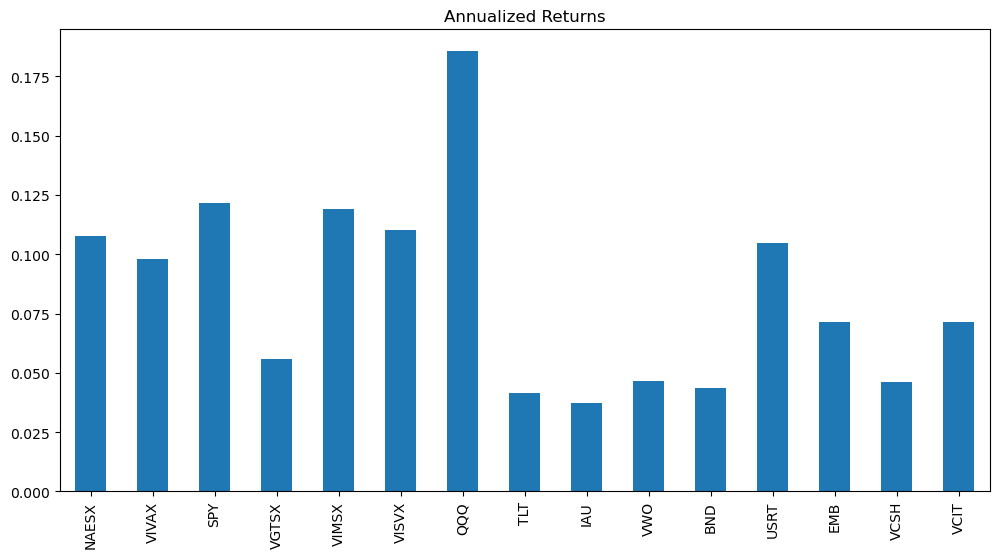

In [ ]:
annu_r = fnc.annualize_returns(r_d, 252)
annu_r.plot.bar(title= 'Annualized Returns', figsize=(12, 6))

<Axes: title={'center': 'Annualized Volatility'}>

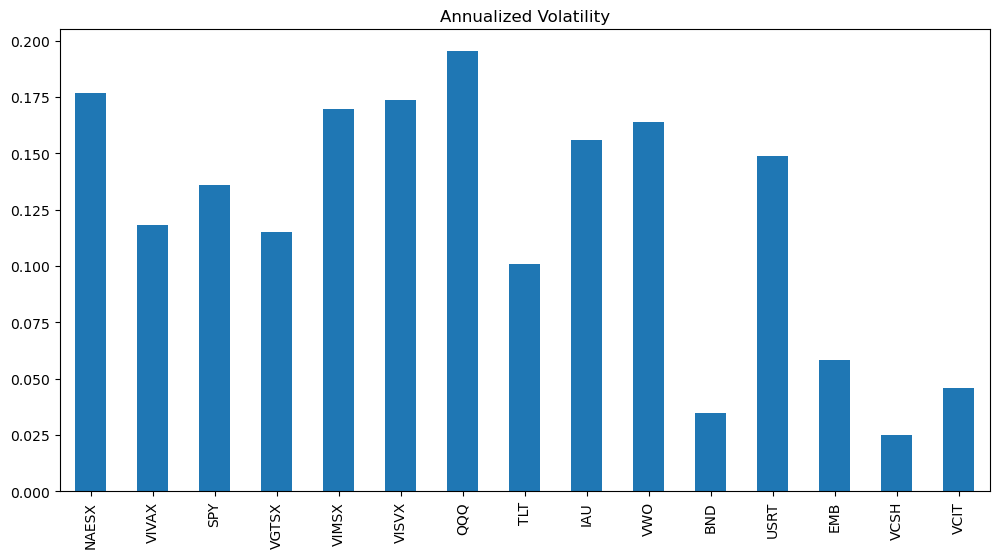

In [ ]:
fnc.annualize_vol(r_d, 252).plot.bar(title= 'Annualized Volatility', figsize=(12, 6))

<Axes: title={'center': 'Sharpe Ratio of Individual Assets'}>

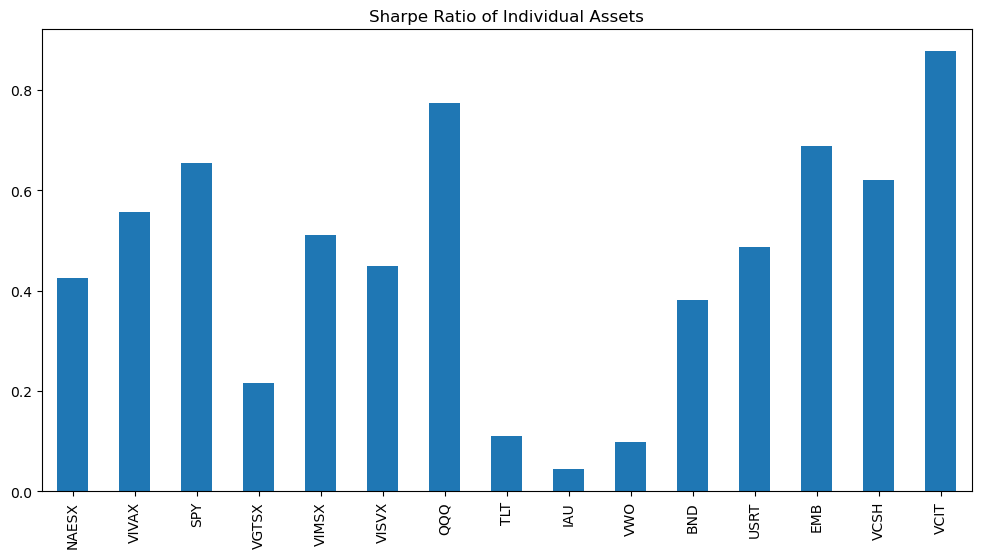

In [ ]:
fnc.sharpe_ratio(r_d, 0.03, 252).plot.bar(figsize=(12,6), title='Sharpe Ratio of Individual Assets')

In [ ]:
import seaborn as sns

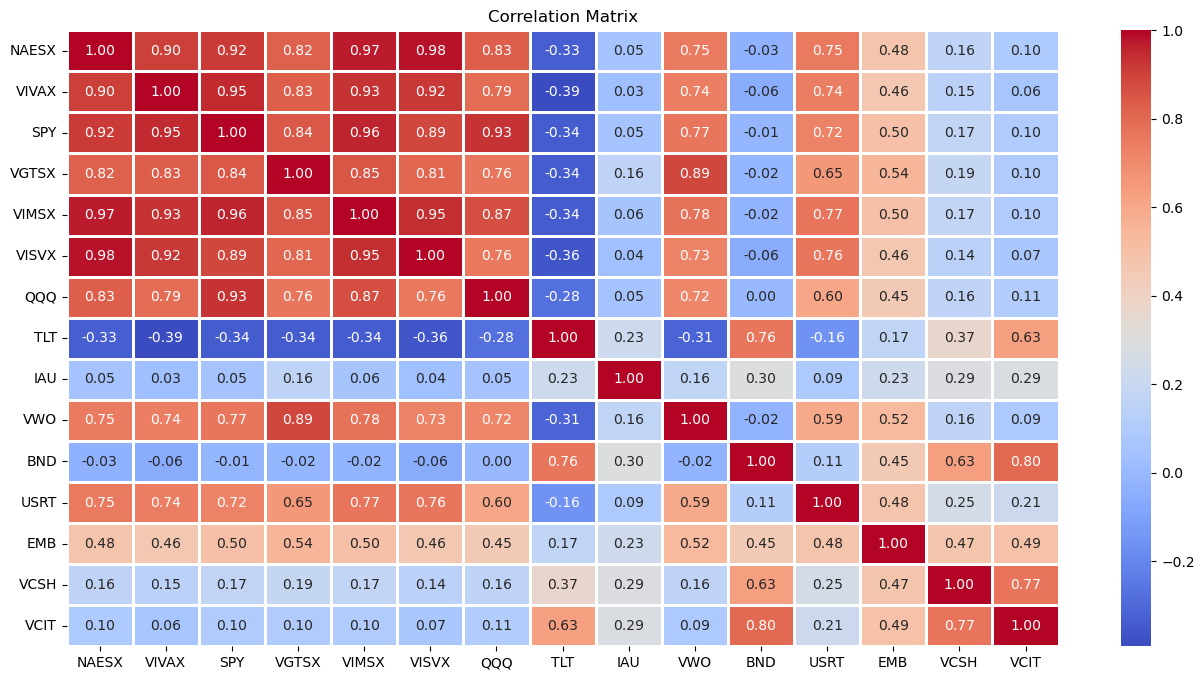

In [ ]:
corr = r_d.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
r_d.corr().describe()

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,BND,USRT,EMB,VCSH,VCIT
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.557022,0.536832,0.562453,0.539802,0.569723,0.538735,0.517264,0.019472,0.201687,0.503178,0.256820,0.506489,0.480609,0.338982,0.327121
std,0.445467,0.456094,0.446177,0.411361,0.451353,0.450613,0.403467,0.472675,0.242638,0.388190,0.373319,0.327241,0.177515,0.265582,0.322227
min,-0.333411,-0.392080,-0.341453,-0.340836,-0.342519,-0.360460,-0.275311,-0.392080,0.030696,-0.312726,-0.057454,-0.158885,0.165089,0.141203,0.060400
25%,0.129398,0.103061,0.136766,0.174073,0.137959,0.106295,0.132325,-0.341144,0.051239,0.161062,-0.023508,0.234314,0.456241,0.160554,0.097215
50%,0.753482,0.739516,0.765440,0.763217,0.776053,0.755313,0.716315,-0.275311,0.161850,0.716315,0.004372,0.604083,0.480888,0.186296,0.105976
75%,0.910349,0.912211,0.922915,0.837141,0.939665,0.903154,0.810058,0.296984,0.257897,0.756099,0.542148,0.746499,0.497640,0.420564,0.558193
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Portfolio Selection
Now that we have got assets that we want to buy let's analyze which portfolio weighting scheme will be most suitable for us.

<Axes: xlabel='Volatility'>

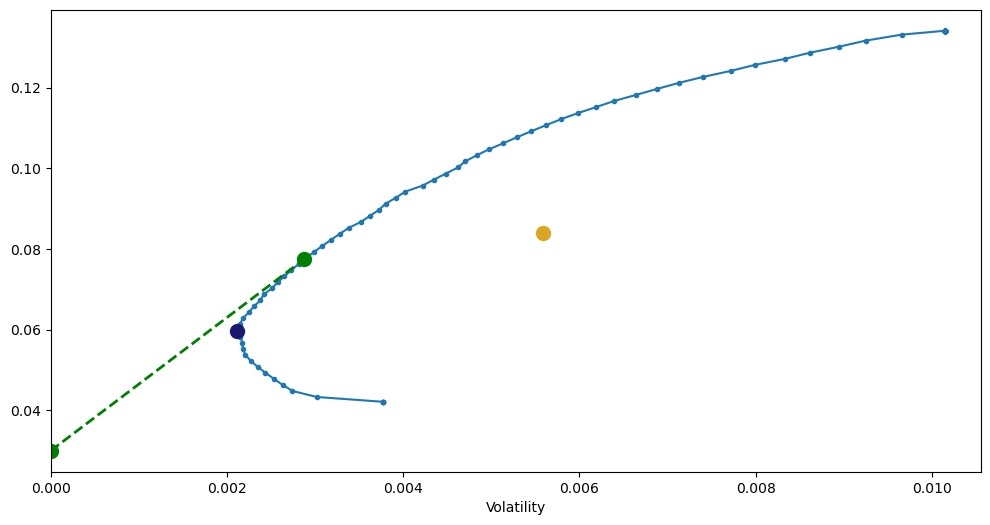

In [ ]:
cov = r_d.cov()
fnc.plot_ef(100, annu_r, cov, show_gmv=True, show_ew= True, show_msr=True, riskfree_rate=0.03, max_asset_weight=0.25) #max allocation for each asset = 25%

## Backtests
Backtest and analyze the results of backtesting results of different types of portfolios

In [ ]:
target_rets = [0.06, 0.08, 0.10, 0.12, annu_r.mean()]
backtest = fnc.combined_backtesting_result(r_d, portfolios=['GMV', 'MSR', 'EW', 'TR'], periods_per_year=252, starting_balance=1000, starting_step=900,
                                            rolling_period=0, reweight_period=90, weights_column=True, max_asset_weight= 0.20, riskfree_rate=0.03,
                                              target_returns=target_rets, weight_constraints = 1)

In [ ]:
backtest

Global Minimum Variance                                          \
                           Returns Account History  Drawdown Previous Peak   
2013-06-25                0.004287     1004.286718  0.000000   1004.286718   
2013-06-26                0.005019     1009.327103  0.000000   1009.327103   
2013-06-27                0.005600     1014.978963  0.000000   1014.978963   
2013-06-28                0.001140     1016.135859  0.000000   1016.135859   
2013-07-01                0.004045     1020.246063  0.000000   1020.246063   
...                            ...             ...       ...           ...   
2024-01-12                0.001167     1709.285386 -0.007613   1722.398314   
2024-01-16               -0.004747     1701.172202 -0.012324   1722.398314   
2024-01-17               -0.002087     1697.621823 -0.014385   1722.398314   
2024-01-18               -0.000261      1697.17877 -0.014642   1722.398314   
2024-01-19                0.000888     1698.686009 -0.013767   1722.398314   

                                                               \
                                                      Weights   
2013-06-25  {'NAESX': 6.183157082157786e-11, 'VIVAX': 0.14...   
2013-06-26  {'NAESX': 6.183157082157786e-11, 'VIVAX': 0.14...   
2013-06-27  {'NAESX': 6.183157082157786e-11, 'VIVAX': 0.14...   
2013-06-28  {'NAESX': 6.183157082157786e-11, 'VIVAX': 0.14...   
2013-07-01  {'NAESX': 6.183157082157786e-11, 'VIVAX': 0.14...   
...                                                       ...   
2024-01-12  {'NAESX': 0.0, 'VIVAX': 0.10263432966710312, '...   
2024-01-16  {'NAESX': 0.0, 'VIVAX': 0.10263432966710312, '...   
2024-01-17  {'NAESX': 0.0, 'VIVAX': 0.10263432966710312, '...   
2024-01-18  {'NAESX': 0.0, 'VIVAX': 0.10263432966710312, '...   
2024-01-19  {'NAESX': 0.0, 'VIVAX': 0.10263432966710312, '...   

           Maximum Sharpe Ratio                                          \
                        Returns Account History  Drawdown Previous Peak   
2013-06-25             0.004621     1004.621085  0.000000   1004.621085   
2013-06-26             0.005398     1010.043978  0.000000   1010.043978   
2013-06-27             0.005930     1016.033321  0.000000   1016.033321   
2013-06-28             0.001277     1017.330942  0.000000   1017.330942   
2013-07-01             0.004066     1021.467596  0.000000   1021.467596   
...                         ...             ...       ...           ...   
2024-01-12             0.001248     1871.682874 -0.003631   1878.503243   
2024-01-16            -0.003559     1865.021088 -0.007177   1878.503243   
2024-01-17            -0.002369     1860.602517 -0.009529   1878.503243   
2024-01-18             0.002098     1864.506728 -0.007451   1878.503243   
2024-01-19             0.003347     1870.746879 -0.004129   1878.503243   

                                                               ...  \
                                                      Weights  ...   
2013-06-25  {'NAESX': 8.972125494219091e-12, 'VIVAX': 0.08...  ...   
2013-06-26  {'NAESX': 8.972125494219091e-12, 'VIVAX': 0.08...  ...   
2013-06-27  {'NAESX': 8.972125494219091e-12, 'VIVAX': 0.08...  ...   
2013-06-28  {'NAESX': 8.972125494219091e-12, 'VIVAX': 0.08...  ...   
2013-07-01  {'NAESX': 8.972125494219091e-12, 'VIVAX': 0.08...  ...   
...                                                       ...  ...   
2024-01-12  {'NAESX': 5.326250339346121e-09, 'VIVAX': 4.12...  ...   
2024-01-16  {'NAESX': 5.326250339346121e-09, 'VIVAX': 4.12...  ...   
2024-01-17  {'NAESX': 5.326250339346121e-09, 'VIVAX': 4.12...  ...   
2024-01-18  {'NAESX': 5.326250339346121e-09, 'VIVAX': 4.12...  ...   
2024-01-19  {'NAESX': 5.326250339346121e-09, 'VIVAX': 4.12...  ...   

           Target Returns 12.0%                                          \
                        Returns Account History  Drawdown Previous Peak   
2013-06-25             0.007594     1007.593956  0.000000   1007.593956   
2013-06-26             0.009947     10

In [ ]:
rets = backtest.xs('Returns', level=1, axis=1)
hist = backtest.xs('Account History', level=1, axis=1)
weights = backtest.xs('Weights', level=1, axis=1)
drawdown = backtest.xs('Drawdown', level=1, axis=1)
prev_peak = backtest.xs('Previous Peak', level=1, axis=1)

In [ ]:
# Add S&P500 returns to returns dataframe in order to compare
sp500 = fnc.get_returns_data(tickers=['^GSPC'], start = rets.index[0], end = rets.index[-1], interval='1d')
sp500.index = sp500.index.date
rets['S&P500'] = sp500

C:\Users\user\AppData\Local\Temp\ipykernel_10736\2219055362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rets['S&P500'] = sp500


In [ ]:
fnc.summary_stats(rets, periods_per_year=252, riskfree_rate= 0.03)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Global Minimum Variance,0.051458,0.039018,-1.533809,31.578306,0.003385,0.005487,0.534003,-0.112696,-3860 days
Maximum Sharpe Ratio,0.061109,0.045917,-1.032041,20.805844,0.004269,0.006741,0.657852,-0.142534,-3860 days
Equally Weighted,0.081530,0.086205,-1.048821,19.682525,0.008283,0.012604,0.580412,-0.195157,-3860 days
Target Returns 6.0%,0.063256,0.053296,-0.581547,18.691439,0.004743,0.008001,0.605879,-0.164164,-3860 days
Target Returns 8.0%,0.080647,0.074251,-0.543767,14.590472,0.006976,0.011288,0.662311,-0.201277,-3860 days
Target Returns 10.0%,0.101152,0.116140,-0.796190,18.319404,0.010929,0.017856,0.594859,-0.240252,-3860 days
Target Returns 12.0%,0.117104,0.146307,-0.886158,19.023193,0.013880,0.022292,0.578071,-0.309182,-3860 days
Target Returns 8.400097375092553%,0.086079,0.080796,-0.567780,14.613176,0.007627,0.012356,0.673939,-0.205908,-3860 days
S&P500,0.110016,0.174010,-0.527590,18.274068,0.015760,NaN,0.446623,-0.339250,-3859 days


<Axes: title={'center': 'Performance of different Portfolio schemes'}>

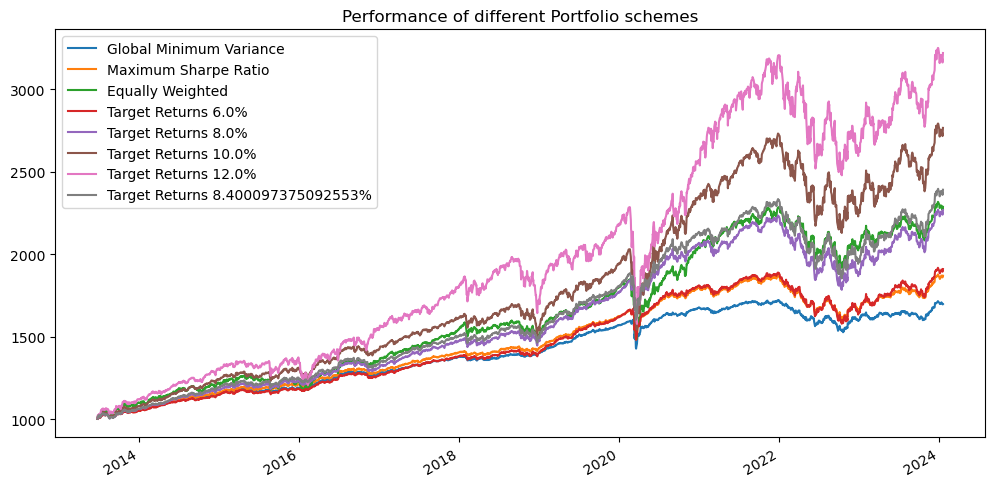

In [ ]:
hist.plot(figsize=(12, 6), title= 'Performance of different Portfolio schemes')

In [ ]:
weights_change = fnc.weights_change(weights)

In [ ]:
weights_mean = fnc.weights_mean(weights_change)
weights_mean

,Global Minimum Variance,Maximum Sharpe Ratio,Equally Weighted,Target Returns 6.0%,Target Returns 8.0%,Target Returns 10.0%,Target Returns 12.0%,Target Returns 8.400097375092553%
NAESX,0.000000,0.000000,0.066667,0.000000,0.000011,0.031744,0.143189,0.000271
VIVAX,0.125709,0.031732,0.066667,0.040382,0.011988,0.002279,0.000000,0.010603
SPY,0.000000,0.000000,0.066667,0.029793,0.061506,0.095261,0.078241,0.071098
VGTSX,0.000948,0.000000,0.066667,0.007189,0.000000,0.000000,0.000000,0.000000
VIMSX,0.000000,0.000000,0.066667,0.000000,0.013907,0.125785,0.184948,0.029047
VISVX,0.000000,0.000000,0.066667,0.000051,0.000613,0.041769,0.133564,0.001449
QQQ,0.000000,0.102763,0.066667,0.101913,0.179325,0.197841,0.200000,0.183637
TLT,0.080005,0.073090,0.066667,0.123244,0.161014,0.084255,0.022557,0.159943
IAU,0.000574,0.000000,0.066667,0.003243,0.000000,0.000000,0.000000,0.000000
VWO,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000


So far I have done a fine numbers of analysis, and what I think will suit best to me right now is a target returns portfolio, whether it's the mean of annual returns or a specific target return. Global minimum variance tends to focus too much on non volatile assets and if I regulate the max asset weight too much it tends to work poorly or very similiar to equally weighted. Maximum sharpe ratio is also fine but it's historical returns are not as good and if I am choosing something other than GMV, I would like to target a bit bigger returns.

I know these returns aren't as good but relative to the volatility of the portfolios they seem great. I would like do some advanced level portfolio contruction later, the main problem I faced here was choosing assets and having enough data to backtest, maybe there are advanced ways to filter markets and select a good number of assets which meets my criteria, but right now historical data is a problem too.

In future if I learn a way to create alpha then maybe it will be much better. But still I think these analysis are great and can be of good use.

## IBKR Execution

In [ ]:
ib = IB()

In [ ]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [ ]:
ib.positions()

[Position(account='DU7887554', contract=Stock(conId=14171, symbol='LHA', exchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), position=1.0, avgCost=10.78)]

In [ ]:
assets = annu_r.index
weights = fnc.minimize_vol(target_return=0.08, er = annu_r, cov = cov, max_asset_weight=0.2)

Index(['NAESX', 'VIVAX', 'SPY', 'VGTSX', 'VIMSX', 'VISVX', 'QQQ', 'TLT', 'IAU',
       'VWO', 'BND', 'USRT', 'EMB', 'VCSH', 'VCIT'],
      dtype='object')